<a href="https://colab.research.google.com/github/KeertanPatro/EDA_Classification/blob/main/Cardiovascular_risk_prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascualr risk prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [69]:
# Import Libraries

# data wrangling
import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# librariers for hypothesis tests

from scipy.stats import chi2_contingency


In [2]:
plt.style.use('ggplot')

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification_Capstone_project /data_cardiovascular_risk.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
# Dataset Last look
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


There are no duplicate values found in this dataset.

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

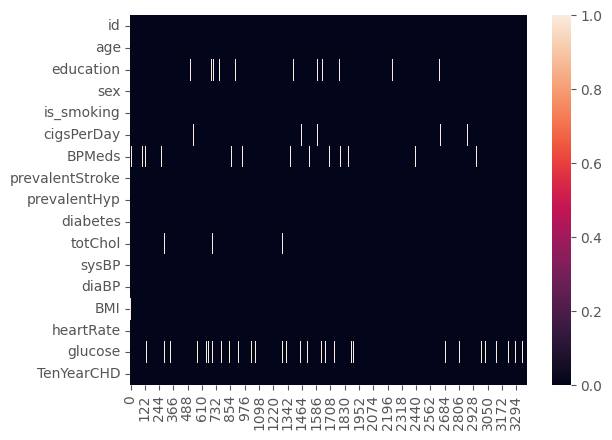

In [11]:
# Visualizing the missing values
sns.heatmap(df.isna().transpose())

### What did you know about your dataset?

* The Dataset has 3390 rowa and 17 columns.
* There are no duplicates in this dataset.
* There are null values in certain columns.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
# Dataset Describe

df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [14]:
# categorical variables
df.describe(include=['object','category'])

,sex,is_smoking
count,3390,3390
unique,2,2
top,F,NO
freq,1923,1703


In [15]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Variables Description 

There are 15 variables each of the variables is a potential risk factor in causing a coronary heart disease. These 15 variables can be categorised into 3 classification, they are Demographic, behavorial and medical.  

**Demographic**  
* Sex:  Sex of the person("M" or "F").   
* Age: Age of the person(Continious) 

**Behavorial**  
* is_smoking: Is the person smoking or not ("YES" or "NO")
* Cigs_per_Day: How cigerattes does the person smoke per day.  


**Medical** 
* BP meds : whether or not the patient was on blood pressure medication (Nominal)
* Prevalent_stroke:  whether or not the patient had previously had a stroke (Nominal)  
* Prevalent_hyp:  whether or not the patient was hypertensive (Nominal)
* Diabetes:  
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous)
* Glucose: glucose level (Continuous)  

**Target variable (desired target)**
* TenYearCHD: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
df.drop('id',axis=1,inplace=True)

In [18]:
# distinguishing numerical and categorical variables

cat_variables=[i for i in df.columns if df[i].nunique()<=4]
print(cat_variables)
num_variables=[i for i in df.columns if df[i].nunique()>4]
print(num_variables)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


### What all manipulations have you done and insights you found?

1. I first dropped 'id' column from the dataset. 
2. I distinguished numerical column and categorical column based on the fact that if number of unique values are less than 4 it is categorical if more than 4 it is numerical. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

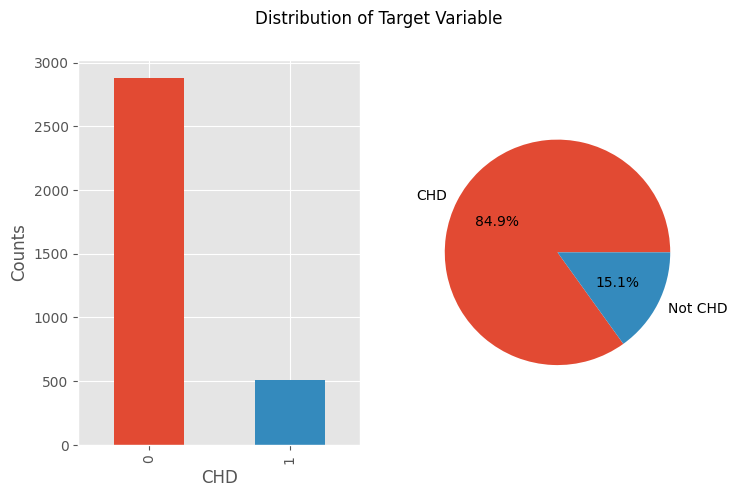

In [19]:
# Chart - 1 visualization code

# Distribution of Target variable
color=sns.color_palette()
fig=plt.figure(figsize=(8,5))
fig.suptitle("Distribution of Target Variable")
plt.subplot(1,2,1)
df['TenYearCHD'].value_counts().plot.bar(color=color)
plt.xlabel("CHD")
plt.ylabel("Counts")
plt.subplot(1,2,2)
plt.pie(df['TenYearCHD'].value_counts(),labels=['CHD','Not CHD'],autopct='%.1f%%',colors=color)

plt.show()

##### 1. Why did you pick the specific chart?

It is important to know how your target variables are distributed, based on that you can do certain transformation while fitting ML models.

##### 2. What is/are the insight(s) found from the chart?

We see that about 85 % of the people in this dataset don't have a risk of getting cornonary heart disease, while 15% have the risk of getting a cornonary heart disease, this makes the dataset imbalance.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight will help us create appropriate ML models which will help us in better prediction

#### Chart - 2

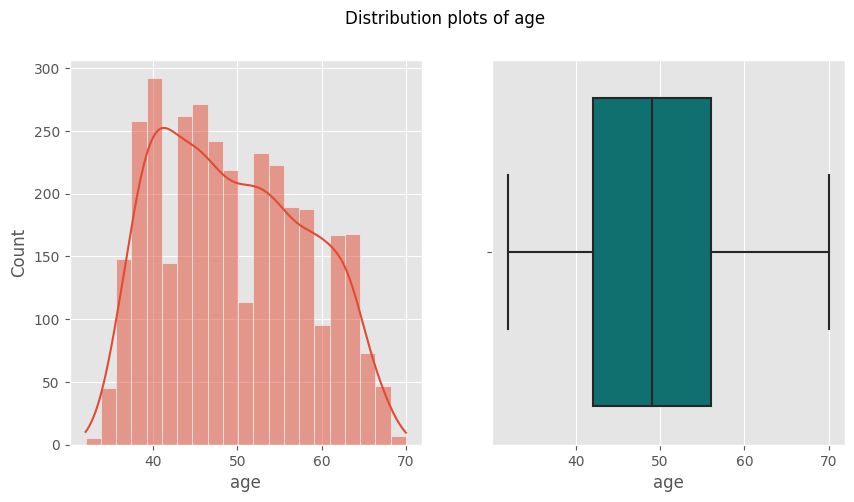

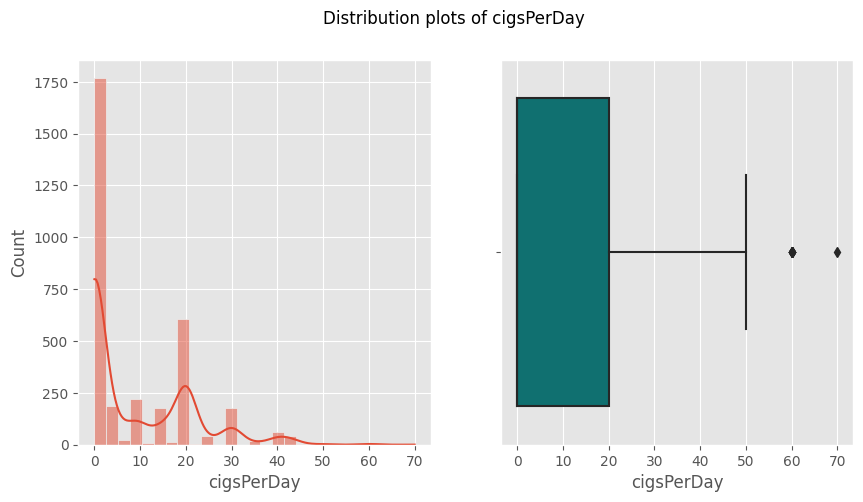

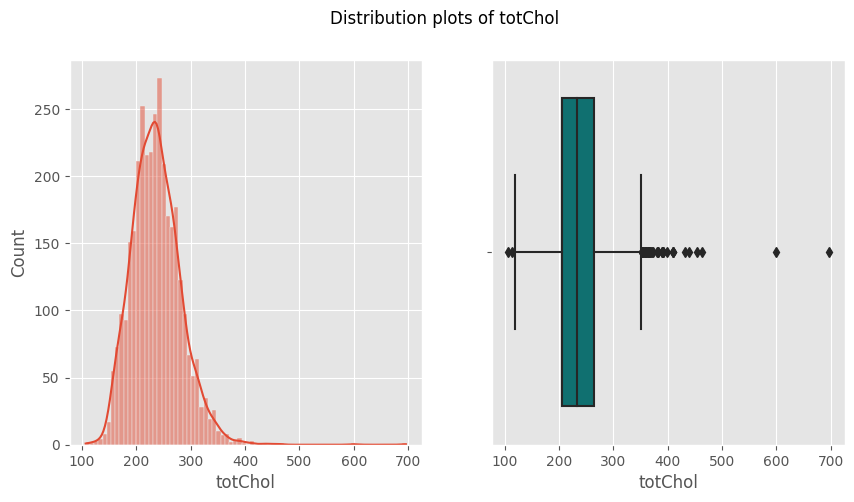

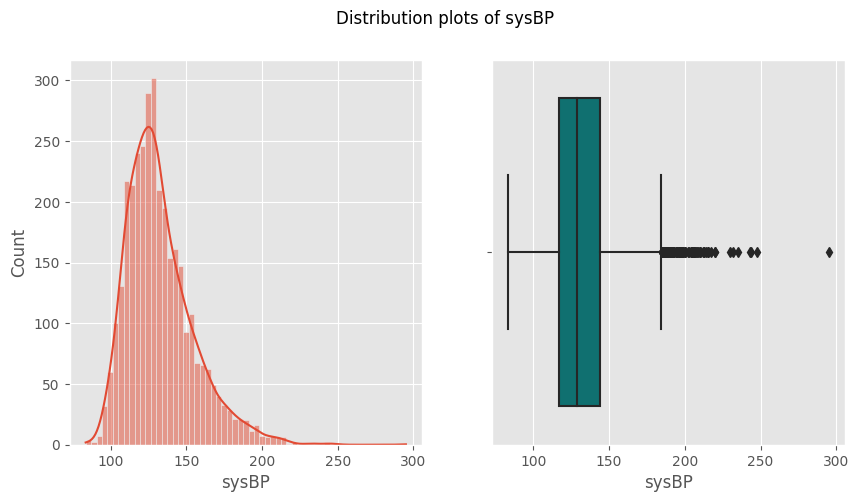

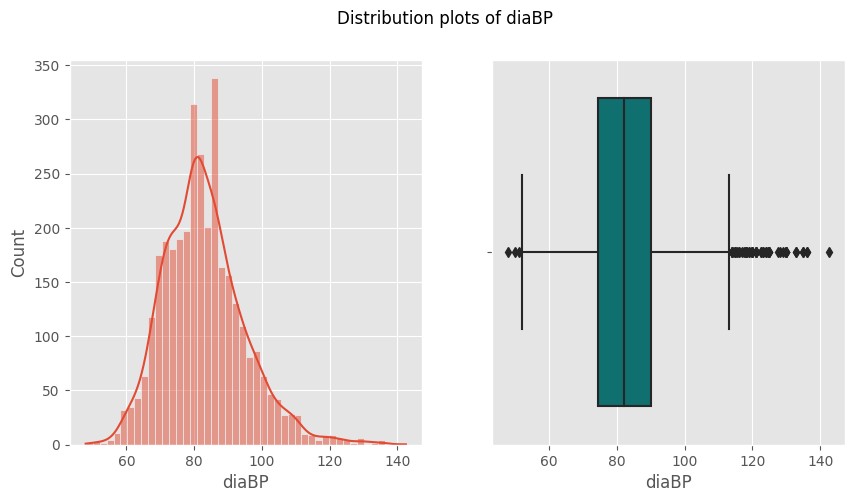

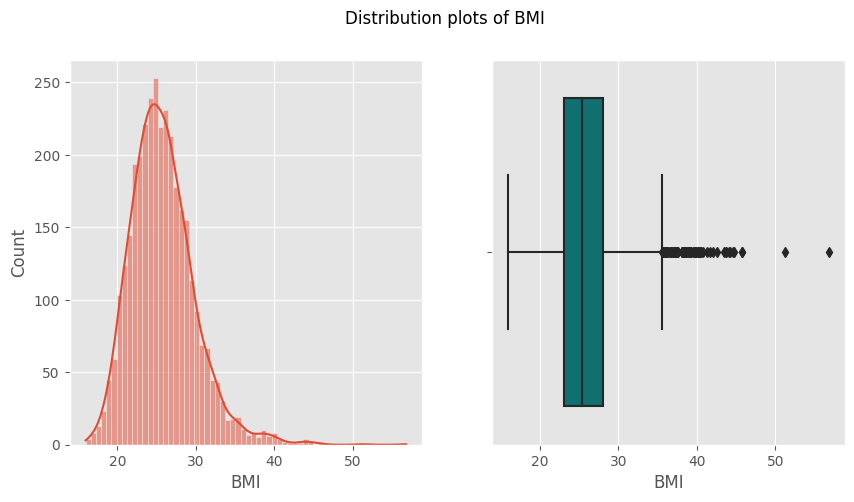

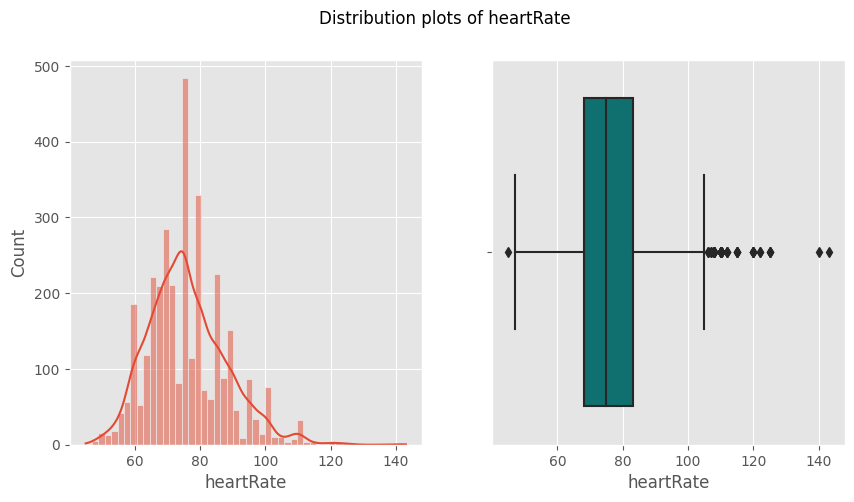

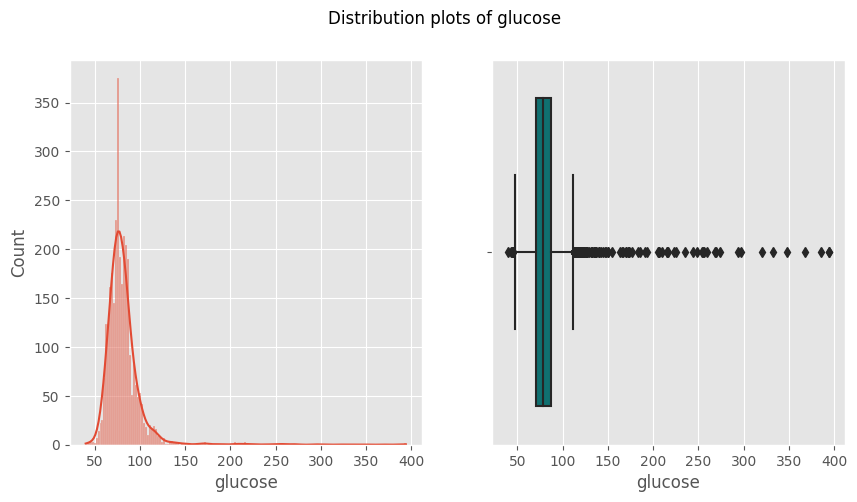

In [20]:
# Chart - 2 visualization code
# Distribution of numeric variables
for i in num_variables:
  fig,ax=plt.subplots(1,2,figsize=(10,5))
  sns.histplot(df[i],kde=True,ax=ax[0])
  sns.boxplot(x=df[i],ax=ax[1],color='teal')
  fig.suptitle("Distribution plots of "+i)

##### 1. Why did you pick the specific chart?

We wanted to see the distribution of other numeric variables as it helps us to understand what kind of ML models to use. We have used histplot to understand nature of the distribution and used boxplot to know about statistical description about each of the variables, we also wanted to see the presence of outliers in each of these variables.  

##### 2. What is/are the insight(s) found from the chart?

Most of the numerical variables seem to follow normal distribution with appreciable amount of skewness.There seems to be many outliers for different variables, we need to handle these outliers for better performance of our ML models.

#### Chart - 3

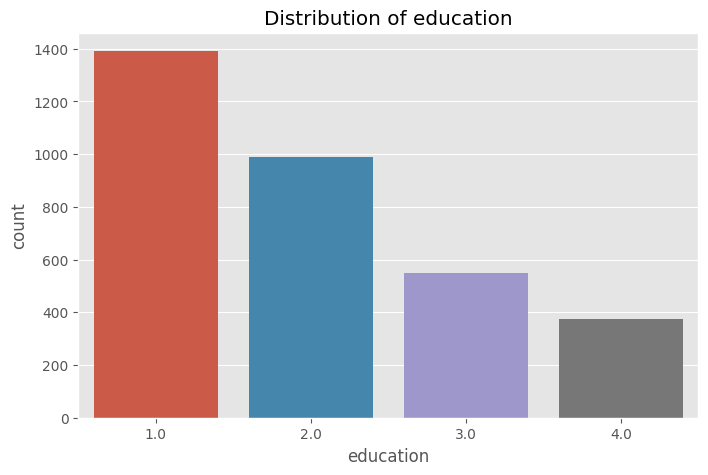

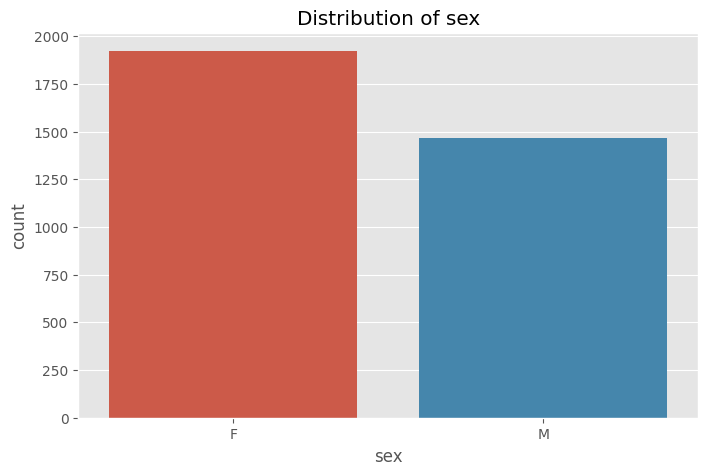

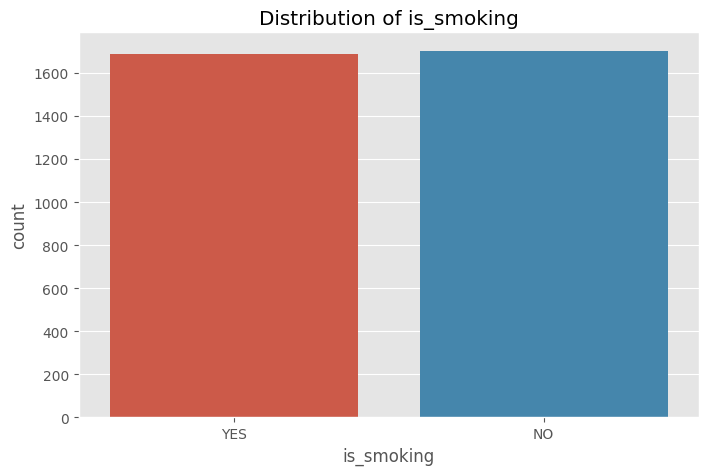

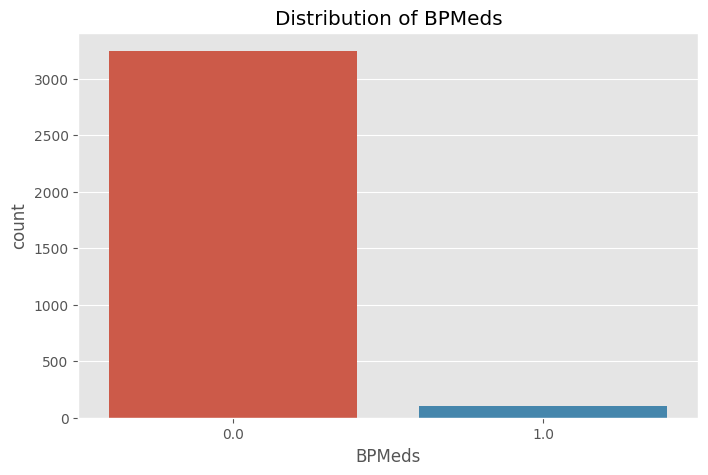

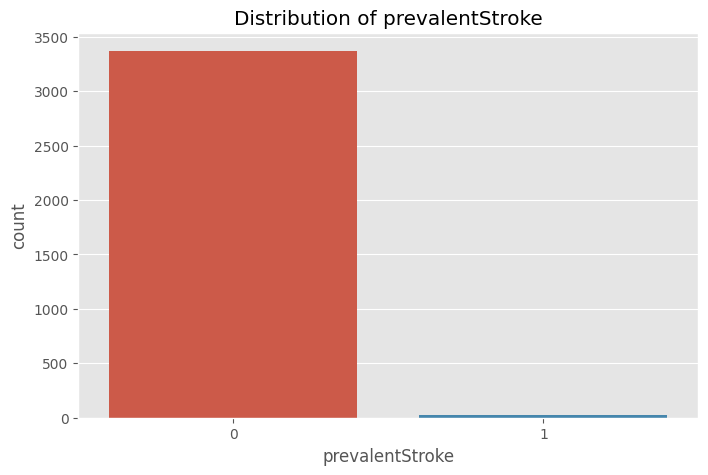

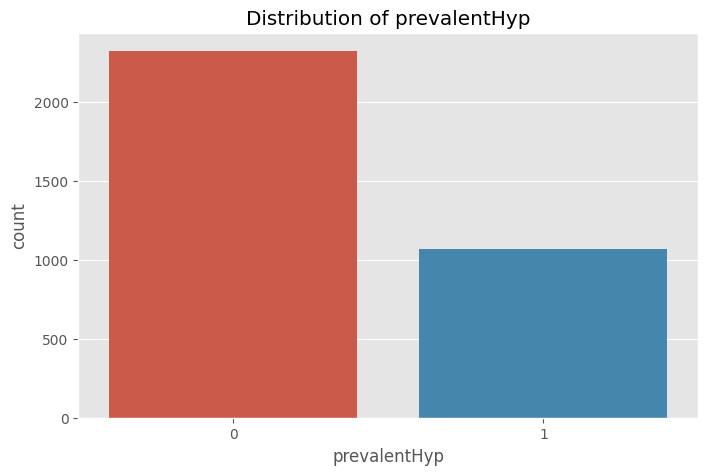

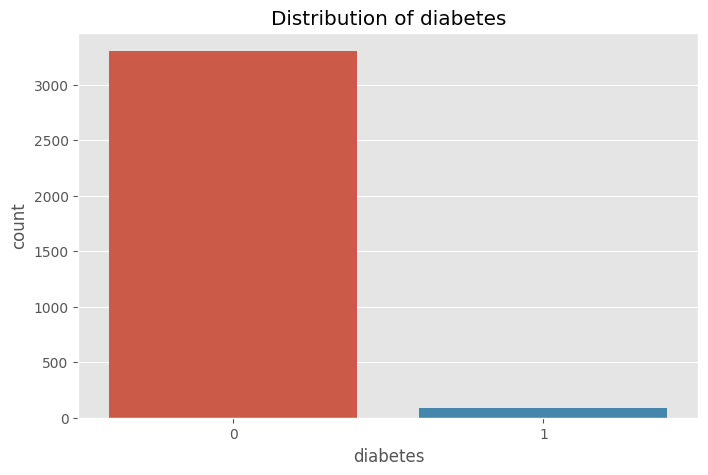

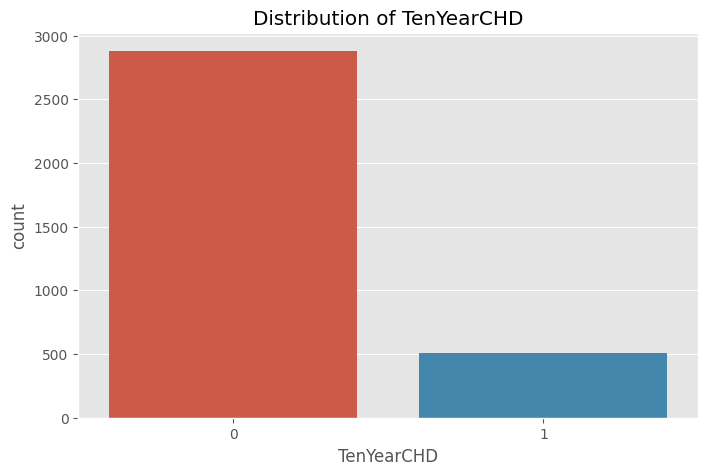

In [21]:
# Chart - 3 visualization code

# Distribution of categorical variables
for col in cat_variables:
  plt.figure(figsize=(8,5))
  sns.countplot(x=col,data=df)
  plt.title("Distribution of "+col)
  plt.show()

##### 1. Why did you pick the specific chart?

Here we have analysed the distribution of categorical variables, all of these categorical variables are demographic variables, we want to look into the distribution of these categorical variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are 7 categorical variables each of them provide some insight.  
* From the distribution of education we infer that there are lot of people with education qualification of 1, less many people with education qualification of 4.   
* From the distribution of sex variable we that there are more females than males.  
* From the distribution of number of people smoking we see that there are equal number of people who smoke and who don't smoke.  
* From the distribution of BP meds we see that there are very few people who take BP medication.  
* From distribution of prevalent stroke we that that there are few people who suffer from prevalent stroke  
* From distribution of prevalent hypertension we that that there are good number of people who suffer from prevalent hypertension but it is less than the number of people who don't suffer from prevalent hypertension.  
* There are very few people who are diabetic. 

#### Chart - 4

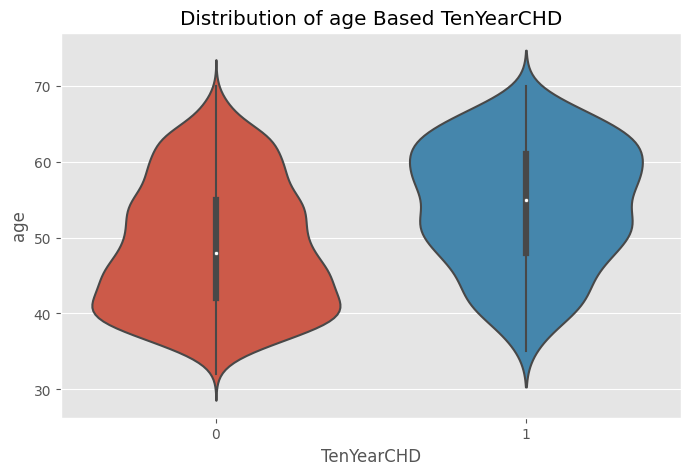

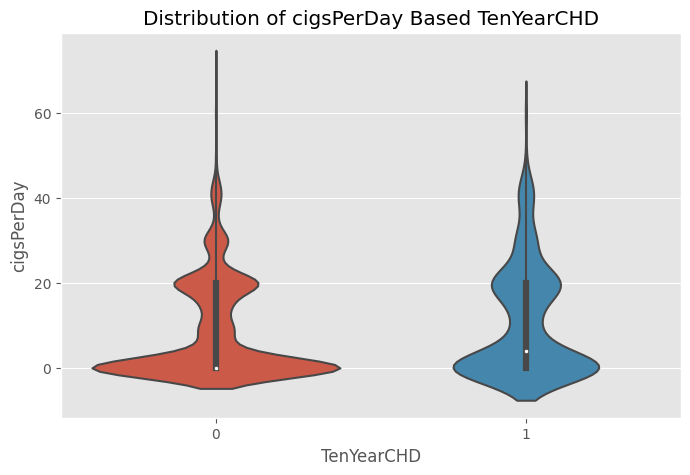

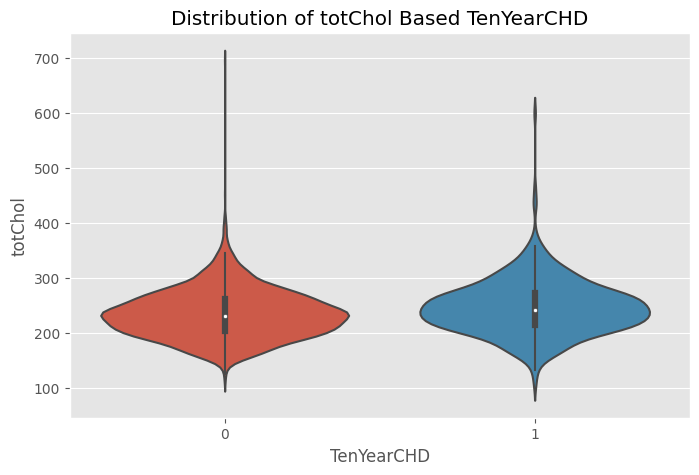

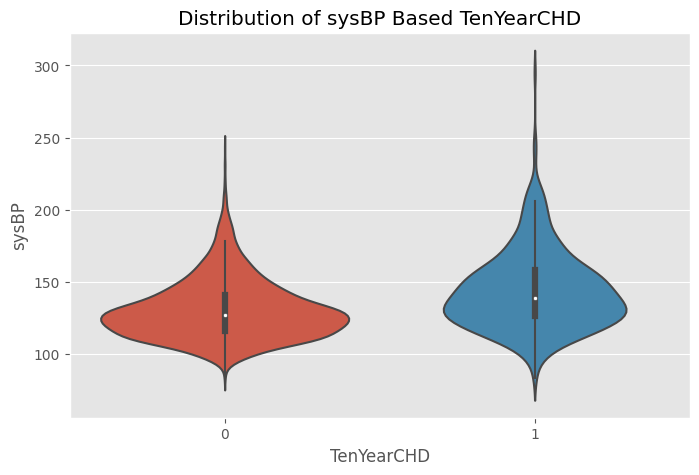

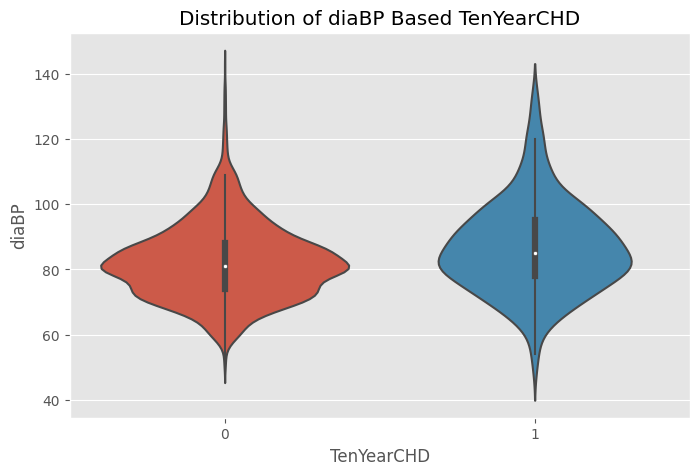

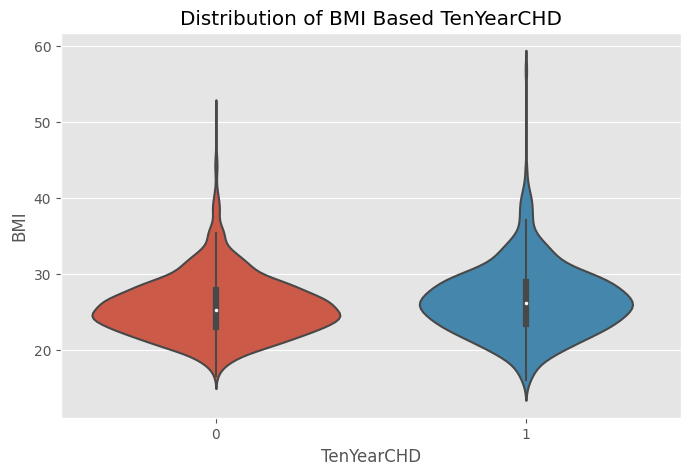

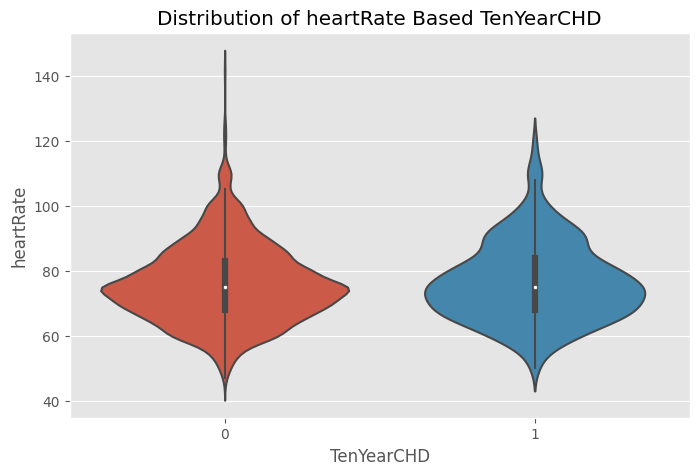

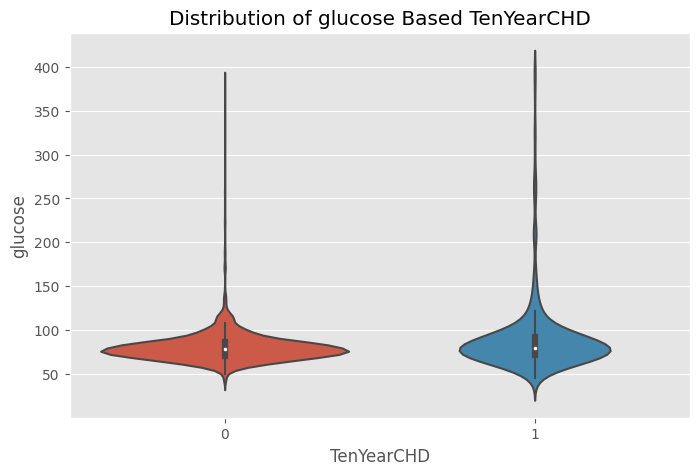

In [22]:
# Chart - 4 visualization code

# Distribution of numeric variables based on target variable
for col in num_variables:
  plt.figure(figsize=(8,5))
  sns.violinplot(x ='TenYearCHD', y = col, data = df)
  plt.title("Distribution of "+col +" Based TenYearCHD")

##### 1. Why did you pick the specific chart?

Here we are doing bivariate analysis of target variable with respect to various numeric variables, a violin plot is the best method to unserstand the relation between these two variables.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the above chart are:   
* People with age around 60 have high risk of getting CHD(cornary heart disease)  
* People with choestrol around 250 have high risk of getting CHD  
* People with Sys BP around 125 have high risk of getting CHD  
* People with dia BP of around 80 have high risk of getting CHD  
* people with high risk of getting CHD have BMI around 25  
* people with high risk of CHD have glucode level around 60  

#### Chart - 5

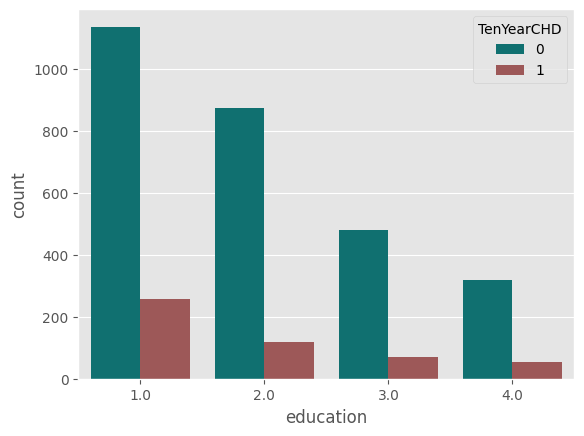

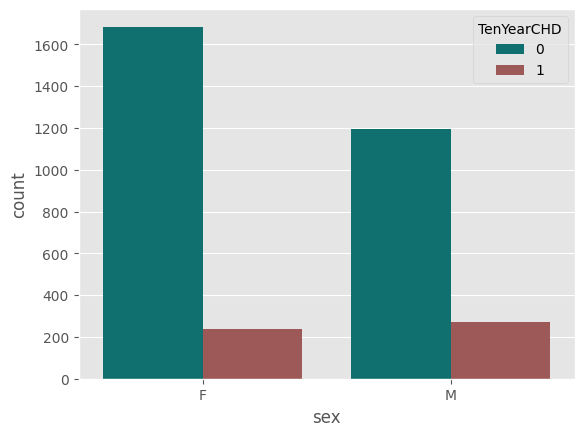

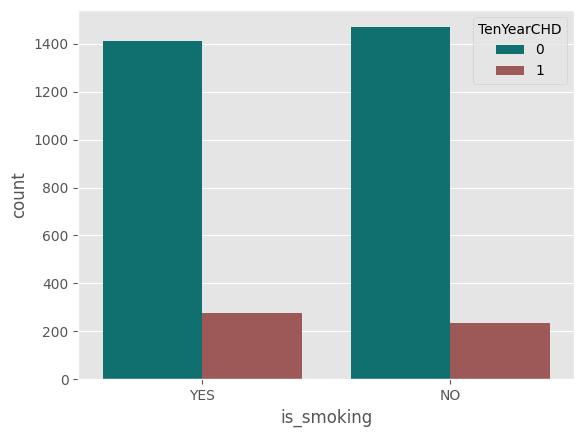

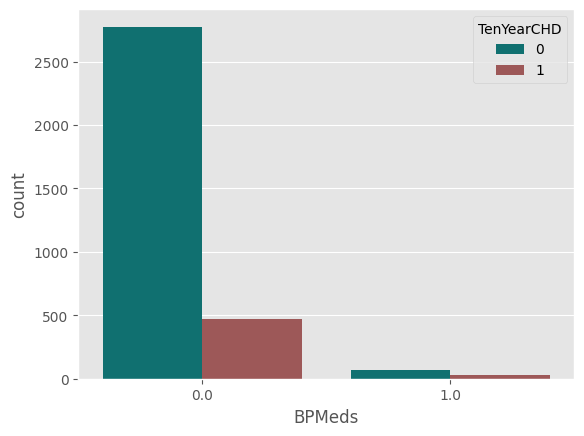

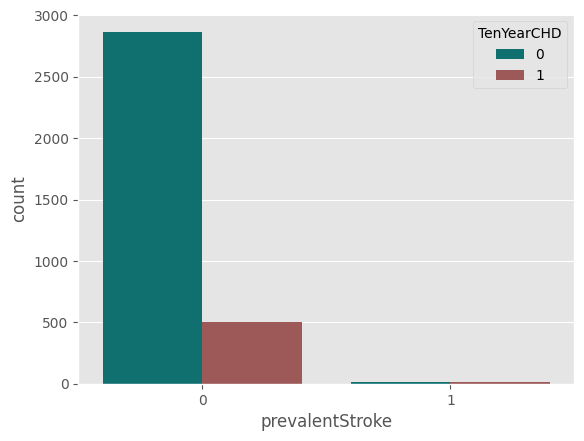

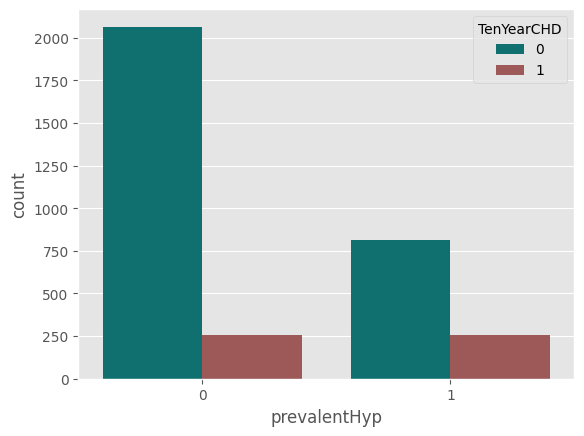

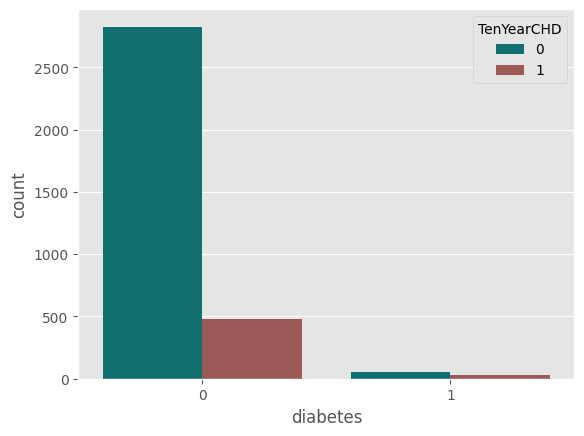

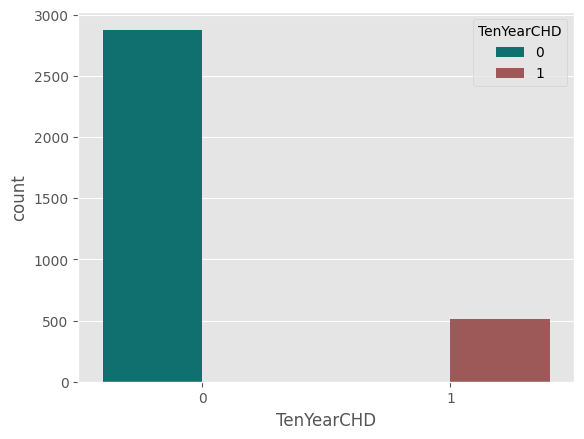

In [23]:
# Chart - 5 visualization code
# categorical variable vs target variable

palette={0:'teal',1:'#a94c4c'}
for col in cat_variables:
  plt.figure()
  sns.countplot(x=col,data=df,hue=df['TenYearCHD'],palette=palette)


##### 1. Why did you pick the specific chart?

In this charts we have done a bivariate analysis between categorical variables and our target variables using a bar plot to understand the behaviour of our categorical variables wrt target variable. 

##### 2. What is/are the insight(s) found from the chart?

There are some insights which are found from above chart:  
* Both male and female have equal number of CHD, suggesting that CHD is not gender specific.  
* Equal number of people who smoke and people who don't smoke are affected by CHD, which might suggest that smoking does not cause CHD.  
* 50 percent of the people who are in a risk of CHD suffere from prevelent hypertension.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this insights we get an idea how demographics variables such as gender, age,education etc are related to CHD, we can create more awareness while spreading this information.

#### Chart - 6

In [24]:
# Chart - 6 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [25]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [26]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [27]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [28]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [29]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [30]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [31]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-32-19e501ef7520>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='0.2f')


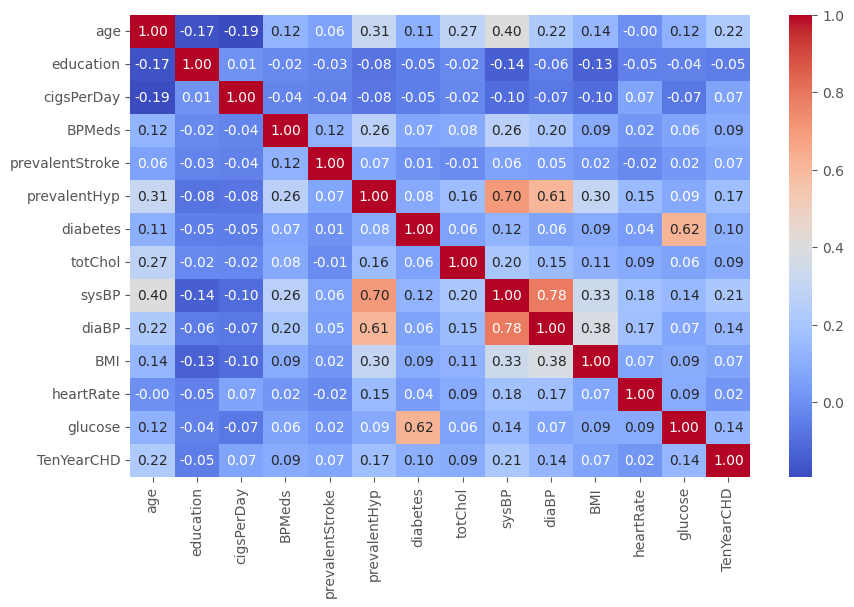

In [32]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='0.2f')
plt.show()

##### 1. Why did you pick the specific chart?

We picked this chart to understand the correlation between our variables, we don't want high multicolinearity between our variables as this can affect our ML models performance.

##### 2. What is/are the insight(s) found from the chart?

From the above charts we found that variables SysBP and DiaBP have high correlation, we also found variables glucose and diabetes have high correlation.

#### Chart - 15 - Pair Plot 

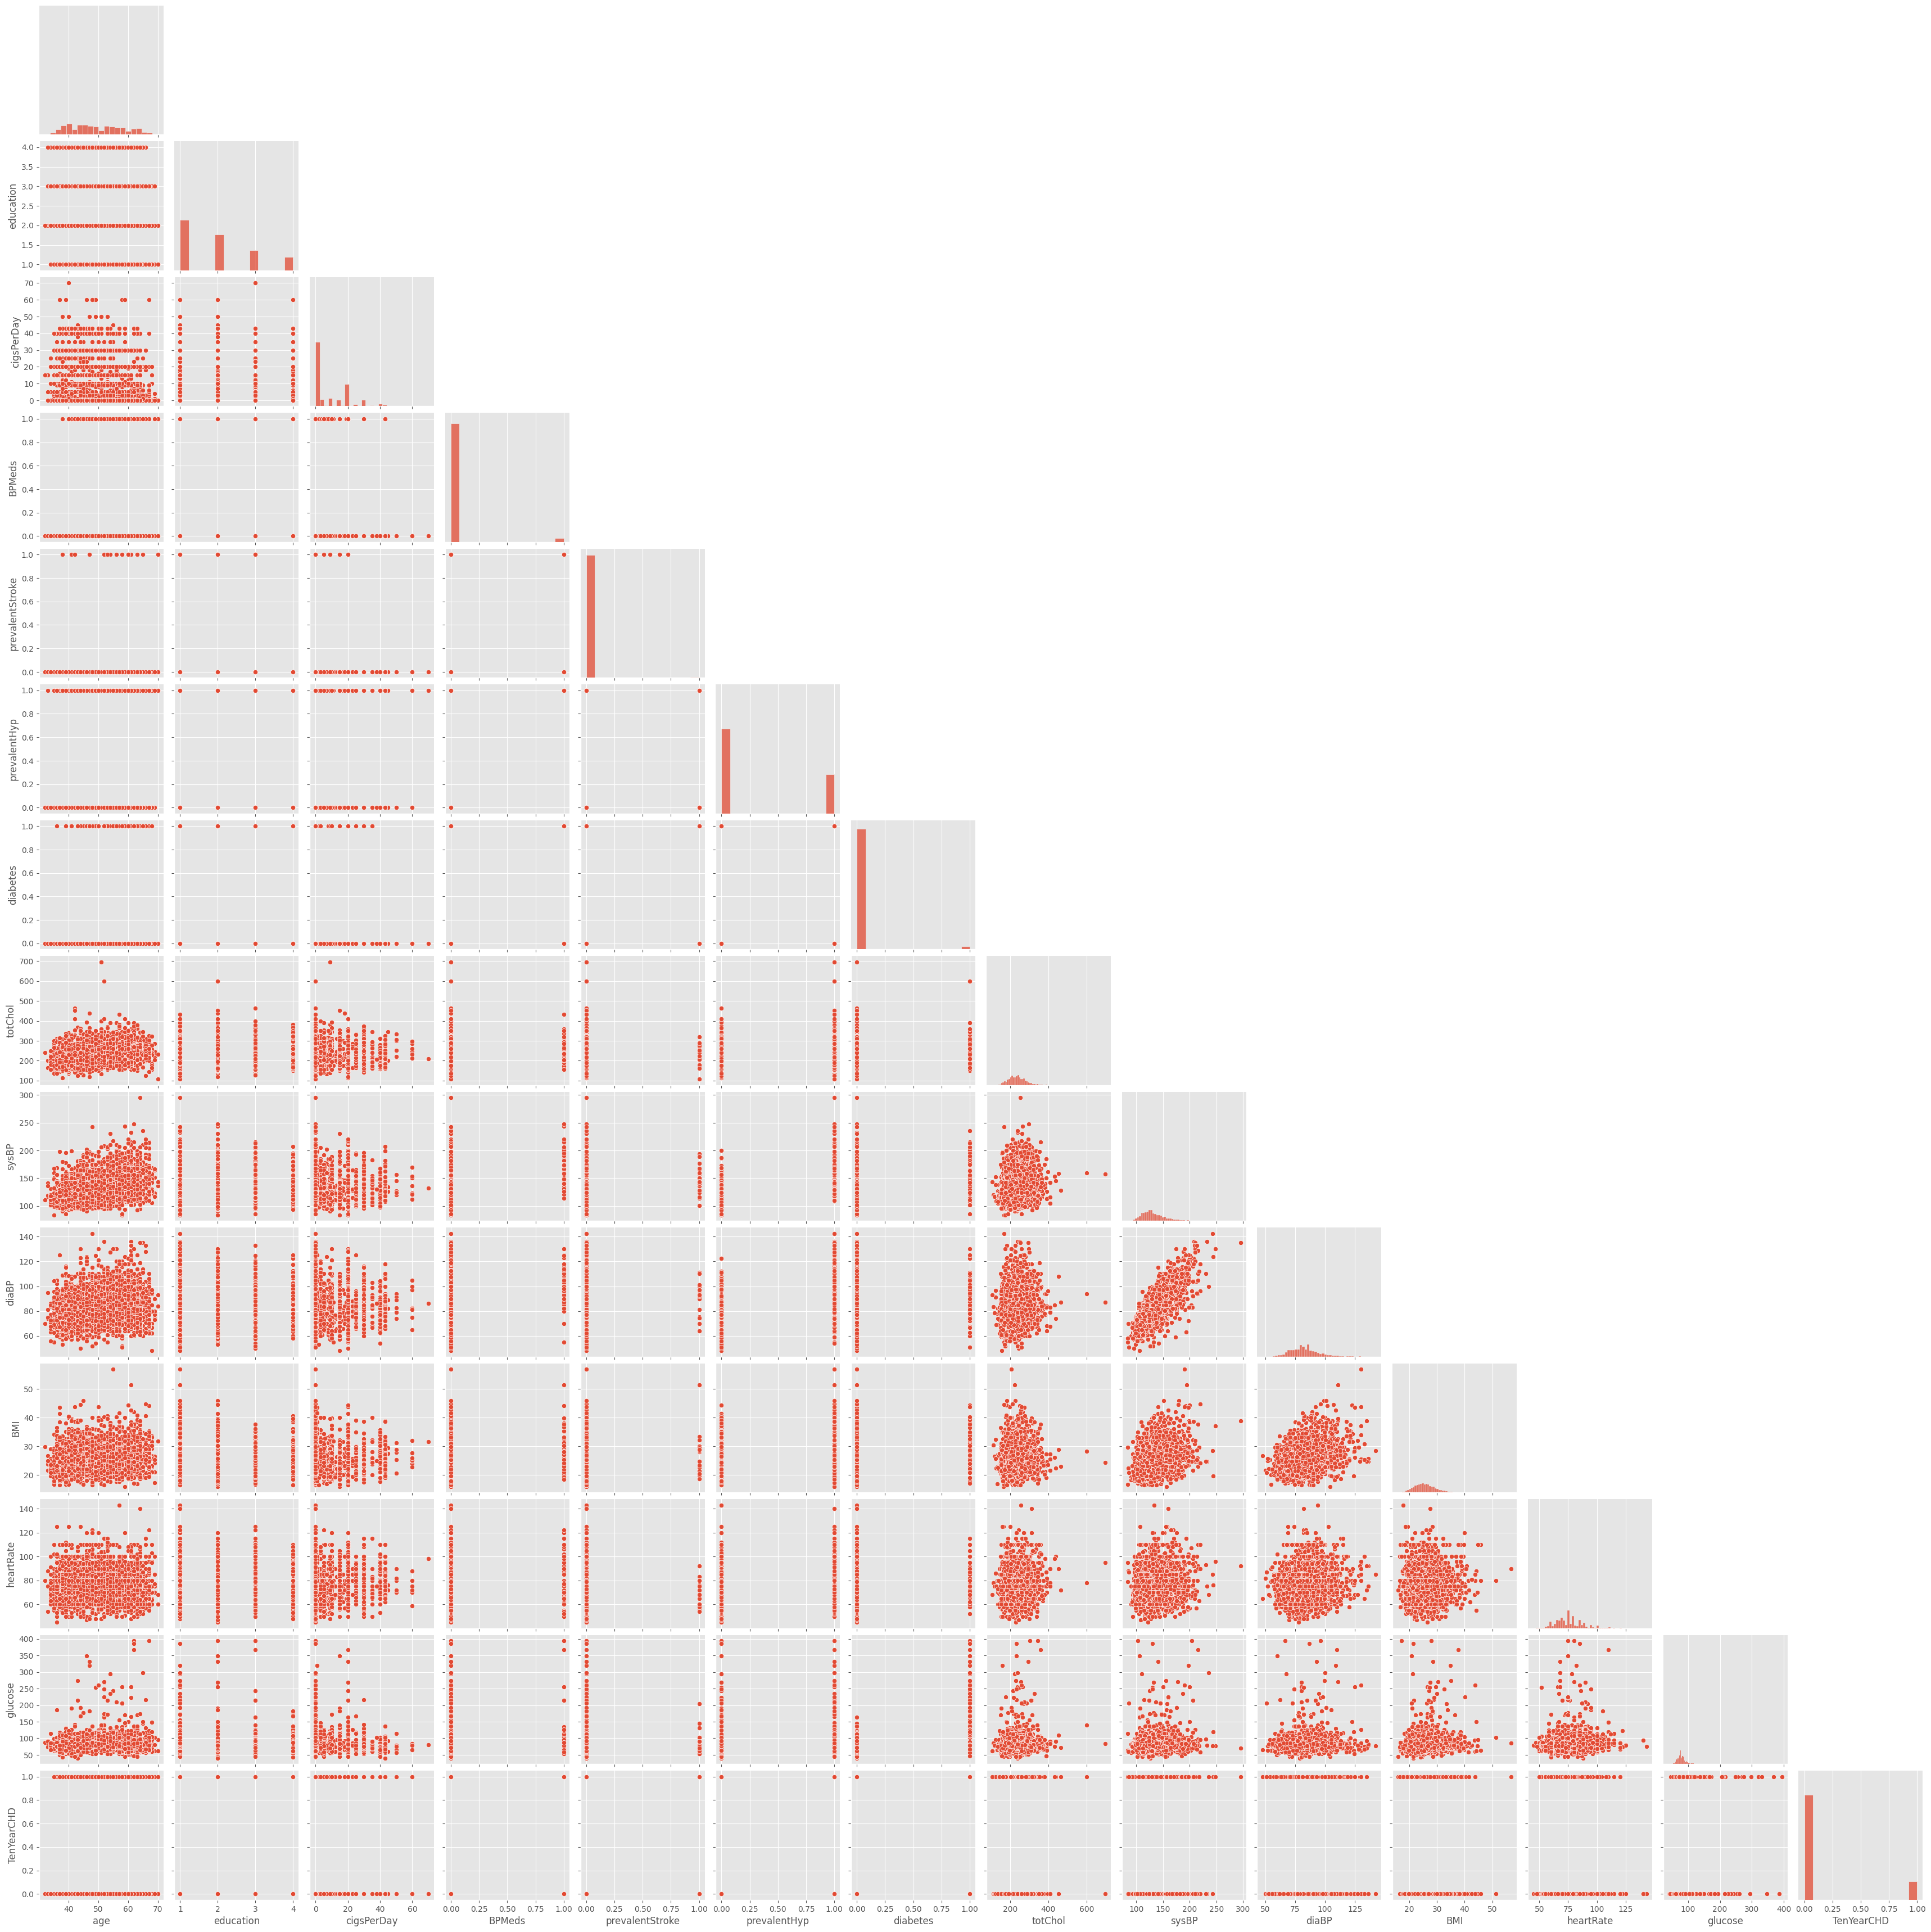

In [33]:
# Pair Plot visualization code
sns.pairplot(df,corner=True)

##### 1. Why did you pick the specific chart?

We have done multivariate analysis to understand relationship between each variables.

##### 2. What is/are the insight(s) found from the chart?

We find that variables SysBP and diaBP have linear relationship, which we also found in correlation plot.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

We define three Hypothetical statements  
1. There is no association between education and CHD.  
2. There is no association between gender and CHD.  
3. There is no association between smoking and CHD.  

* Here we have significance leel of 0.05.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis H0: There is no association between education and CHD  
Alternative Hypothesis H1: There is association between education and CHD  

#### 2. Perform an appropriate statistical test.

In [78]:
# Perform Statistical Test to obtain P-Value
cross_tab=pd.crosstab(df['education'],df['TenYearCHD'])
stat,p_value,dof,expected = chi2_contingency(cross_tab)
print(cross_tab)
print(f"The p_value obtained is {p_value}")

TenYearCHD     0    1
education            
1.0         1135  256
2.0          872  118
3.0          479   70
4.0          319   54
The p_value obtained is 6.038646749234552e-05


##### Which statistical test have you done to obtain P-Value?

We have done chi2 test to obtain p_value, the p_value obtained is way below our significance value of 0.05, hence we reject our null hypothesis that there is no association between education and CHD.

##### Why did you choose the specific statistical test?

We chose chi2 test, it is test which performs on categorical values, and tells us dependency of these categorical values.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is no association between gender and CHD  
H1: There is association between gender and CHD 

#### 2. Perform an appropriate statistical test.

In [84]:
# Perform Statistical Test to obtain P-Value
cross_tab=pd.crosstab(df['sex'],df['TenYearCHD'])
stat,p_value,dof,expected = chi2_contingency(cross_tab)
print(cross_tab)
print(f"The p_value obtained is {p_value}")


TenYearCHD     0    1
sex                  
F           1684  239
M           1195  272
The p_value obtained is 1.060878293561798e-06


##### Which statistical test have you done to obtain P-Value?

We have done chi2 test to obtain p_value, the p_value obtained is way below our significance value of 0.05, hence we reject our null hypothesis that there is no association between gender and CHD.

##### Why did you choose the specific statistical test?

We chose chi2 test, it is test which performs on categorical values, and tells us dependency of these categorical values.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is no association between smoking and CHD.  
H1: There is association between smoking and CHD.  

#### 2. Perform an appropriate statistical test.

In [85]:
# Perform Statistical Test to obtain P-Value
cross_tab=pd.crosstab(df['is_smoking'],df['TenYearCHD'])
stat,p_value,dof,expected = chi2_contingency(cross_tab)
print(cross_tab)
print(f"The p_value obtained is {p_value}")


TenYearCHD     0    1
is_smoking           
NO          1467  236
YES         1412  275
The p_value obtained is 0.05239062274853224


##### Which statistical test have you done to obtain P-Value?

We have done chi2 test to obtain p_value, the p_value obtained is higher than our significance value of 0.05, hence fail reject our null hypothesis that there is no association between smoking and CHD.

##### Why did you choose the specific statistical test?

We chose chi2 test, it is test which performs on categorical values, and tells us dependency of these categorical values.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [37]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [38]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [39]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [40]:
# Expand Contraction

#### 2. Lower Casing

In [41]:
# Lower Casing

#### 3. Removing Punctuations

In [42]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [43]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [44]:
# Remove Stopwords

In [45]:
# Remove White spaces

#### 6. Rephrase Text

In [46]:
# Rephrase Text

#### 7. Tokenization

In [47]:
# Tokenization

#### 8. Text Normalization

In [48]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [49]:
# POS Taging

#### 10. Text Vectorization

In [50]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [51]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [52]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [53]:
# Transform Your data

### 6. Data Scaling

In [54]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [55]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [56]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [57]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [58]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [61]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [63]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [64]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [66]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [67]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***